# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
694,2,90,60,0,0,23.5,0.191,25,0
257,2,114,68,22,0,28.7,0.092,25,0
389,3,100,68,23,81,31.6,0.949,28,0
759,6,190,92,0,0,35.5,0.278,66,1
652,5,123,74,40,77,34.1,0.269,28,0


In [ ]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4316 - loss: 0.8732 - val_accuracy: 0.4531 - val_loss: 0.8732
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4755 - loss: 0.7828 - val_accuracy: 0.4688 - val_loss: 0.8558
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4824 - loss: 0.7942 - val_accuracy: 0.4896 - val_loss: 0.8396
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5169 - loss: 0.7946 - val_accuracy: 0.5052 - val_loss: 0.8243
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4927 - loss: 0.7932 - val_accuracy: 0.5104 - val_loss: 0.8099
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5385 - loss: 0.7723 - val_accuracy: 0.5417 - val_loss: 0.7964
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5750 - loss: 0.7353 - val_accuracy: 0.5573 - val_loss: 0.7836
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5772 - loss: 0.7380 - val_accuracy: 0.5729 -

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

# y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
# y_pred_class_nn_1[:10]

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.555172  ],
       [0.6363685 ],
       [0.22566831],
       [0.15222237],
       [0.2607424 ],
       [0.3931934 ],
       [0.02537813],
       [0.33224264],
       [0.9315717 ],
       [0.16069913]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

roc-auc is 0.813


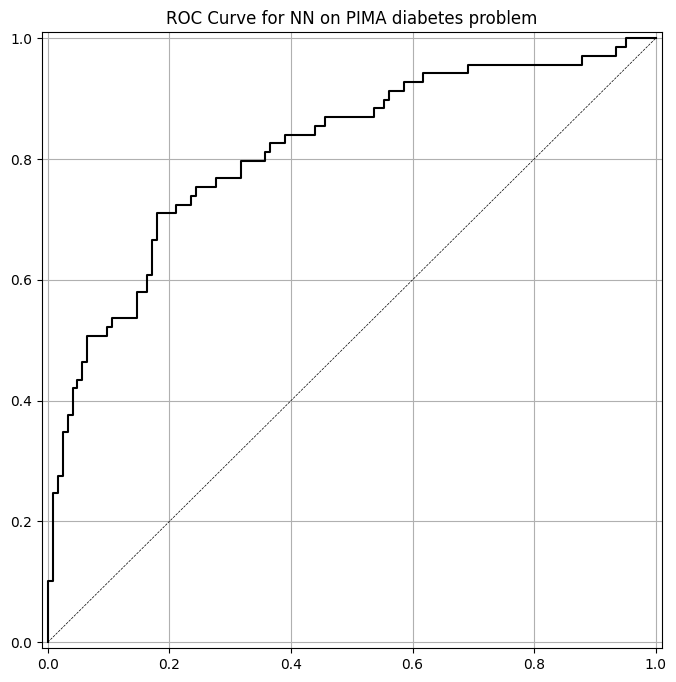

In [ ]:
#print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

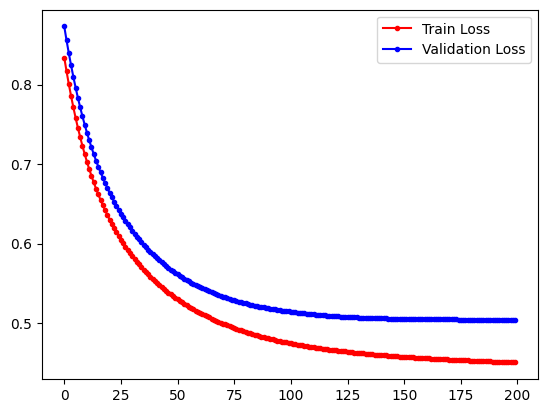

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

> *Based on the graph, the model seems to work well because the train loss and validation loss is downward. However, the validation loss seemed to stabilize around 0.53 while the train loss is still improving. I will interpret this such that the model might be stuck learning something.*

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
# * Build a model with two hidden layers, each with 6 nodes
# * Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

supple_model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# * Use a learning rate of .003 and train for 1500 epochs

supple_model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
supple_run_hist = supple_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6234 - loss: 0.6244 - val_accuracy: 0.6562 - val_loss: 0.6406
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6550 - loss: 0.6203 - val_accuracy: 0.6510 - val_loss: 0.6393
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6444 - loss: 0.6238 - val_accuracy: 0.6615 - val_loss: 0.6380
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6669 - loss: 0.6199 - val_accuracy: 0.6615 - val_loss: 0.6368
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6489 - loss: 0.6177 - val_accuracy: 0.6615 - val_loss: 0.6355
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6403 - loss: 0.6286 - val_accuracy: 0.6615 - val_loss: 0.6343
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6235 - loss: 0.6227 - val_accuracy: 0.6615 - val_loss: 0.6332
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6487 - loss: 0.6189 - val_accura

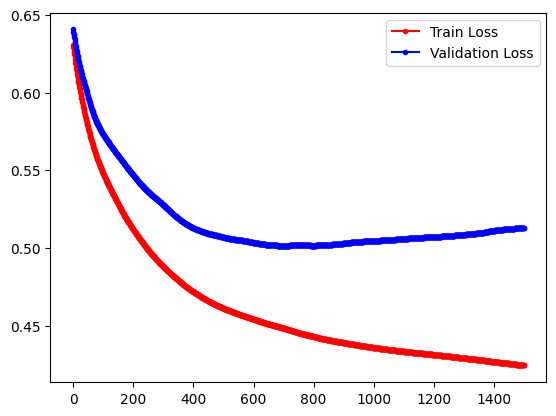

In [ ]:
# * Graph the trajectory of the loss functions on both train and test set

fig, ax = plt.subplots()
ax.plot(supple_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(supple_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

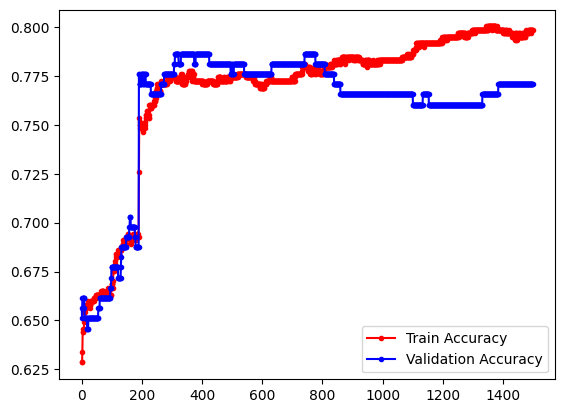

In [ ]:
# * Graph the trajectory of the accuracy on both train and test set
fig, ax = plt.subplots()
ax.plot(supple_run_hist.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(supple_run_hist.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

roc-auc is 0.813


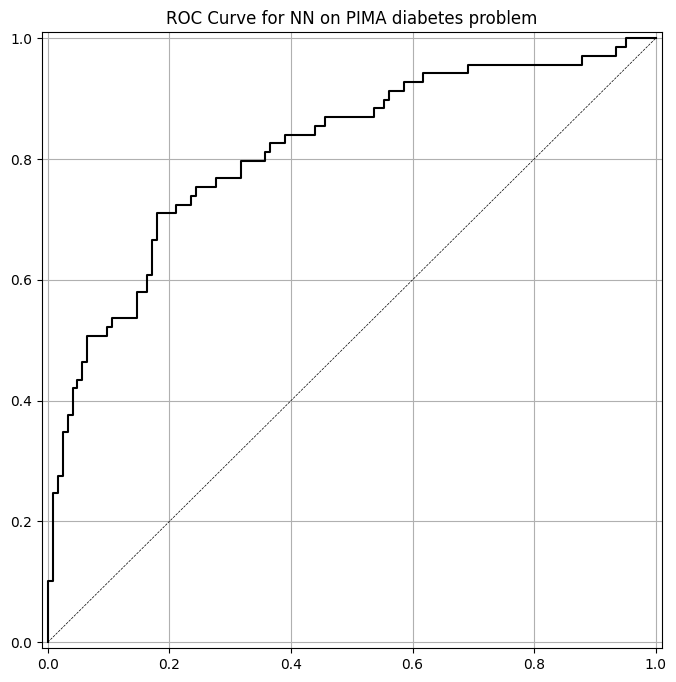

In [ ]:
# * Plot the roc curve for the predictions

print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [ ]:
# * Use different learning rates, numbers of epochs, and network structures.

new_supple_model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

new_supple_model.compile(SGD(learning_rate = .005), "binary_crossentropy", metrics=["accuracy"])
new_supple_run_hist = new_supple_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=400)

Epoch 1/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3562 - loss: 0.7860 - val_accuracy: 0.3594 - val_loss: 0.7862
Epoch 2/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3440 - loss: 0.7788 - val_accuracy: 0.3750 - val_loss: 0.7673
Epoch 3/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3760 - loss: 0.7663 - val_accuracy: 0.4010 - val_loss: 0.7518
Epoch 4/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4162 - loss: 0.7474 - val_accuracy: 0.4167 - val_loss: 0.7392
Epoch 5/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4519 - loss: 0.7211 - val_accuracy: 0.4896 - val_loss: 0.7286
Epoch 6/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4832 - loss: 0.7273 - val_accuracy: 0.5052 - val_loss: 0.7198
Epoch 7/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5420 - loss: 0.7175 - val_accuracy: 0.5729 - val_loss: 0.7122
Epoch 8/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5484 - loss: 0.7164 - val_accuracy: 0.58

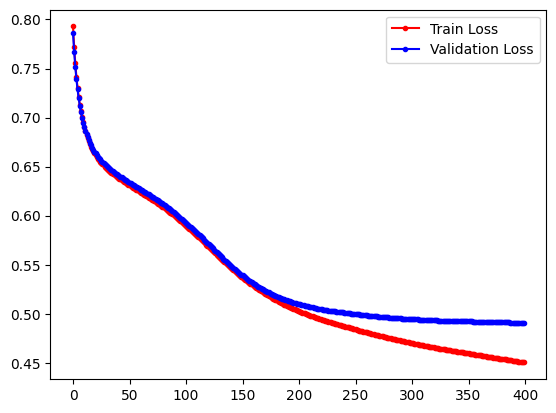

In [ ]:
# * Plot the results of training and validation loss using different learning rates, number of epocgs and network structures

fig, ax = plt.subplots()
ax.plot(new_supple_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(new_supple_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

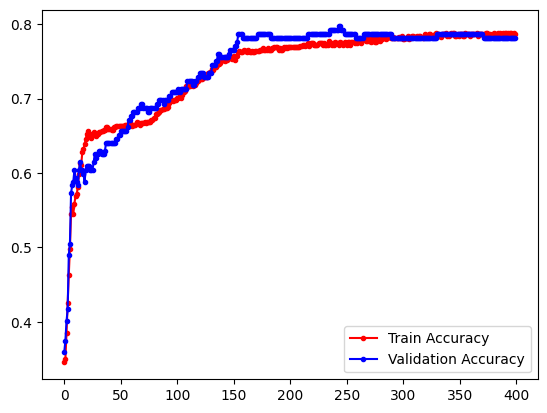

In [ ]:
fig, ax = plt.subplots()
ax.plot(new_supple_run_hist.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(new_supple_run_hist.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

Interpret your result
> *To get better result than the previous attempts, I added 1 more dense layer in the hidden layer with 12 hidden nodes. Then, I increased the learning rate to 0.005 and decreased the epochs to 400. I decreased the epochs because I think the model is overfitting above the 400th epoch. As seen on the graph, the improvement wasn't much, but the ability of the model to generalize is better because the curve of both the train and validation loss and accuracy is almost on equal terms.*

#### Conclusion

> *Through this activity, I was able to train neural networks using keras. The way the code was written was almost similar to tensorflow. The difference is that instead of connecting the layers by passing it to variables, we directly made the layers inside the Sequential() function. Overall I understand how to create my own neural network using keras.*